In [7]:
import numpy as np
import pandas as pd

# 시각화를 위한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina") # retina 설정

plt.style.use("seaborn-whitegrid") # 스타일 지정

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
raw = pd.read_csv('/content/drive/MyDrive/하영/캐글데이터로데이터분석하기/kaggle_survey_2020_responses.csv')
question = raw.iloc[0]
answer = raw.drop([0]) # 0번째를 제외하고 나머지

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
def show_countplot_by_qno(qno, fsize=(10,6), order=None):
  if not order:
    order = answer[qno].value_counts().index
  plt.figure(figsize=fsize)
  sns.countplot(data=answer, y=qno, 
                order=order, palette="Blues_r"
                ).set_title(question[qno])

In [28]:
def get_question_title_by_qno(qno):
  if qno in question.index:
    return question[qno]
  else:
    q_no = question.filter(regex=qno)[0].split("-")[0]
    return q_no

In [24]:
def get_multiple_choice_answer_by_qno(qno):
  df_answer = answer.filter(regex=qno)
  answer_desc = df_answer.describe()
  answer_count = answer_desc.loc[["top", "count"]].T.set_index("top")
  answer_count = answer_count.sort_values(by="count", ascending=False)
  return answer_count

In [25]:
def show_multiple_choice_bar_plot_by_qno(qno):
  multiple_choice_answer = get_multiple_choice_answer_by_qno(qno)

  plt.figure(figsize=(10,6))
  sns.barplot(data=multiple_choice_answer, y=multiple_choice_answer.index, 
              x="count", palette="Blues_r"
              ).set_title(get_question_title_by_qno(qno))

In [26]:
def show_plot_by_qno(qno):
  if qno in question.index: # 컬럼명에 확실히 qno가 있느냐
    show_countplot_by_qno(qno)
  else:
    show_multiple_choice_bar_plot_by_qno(qno)

# Q8 What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice

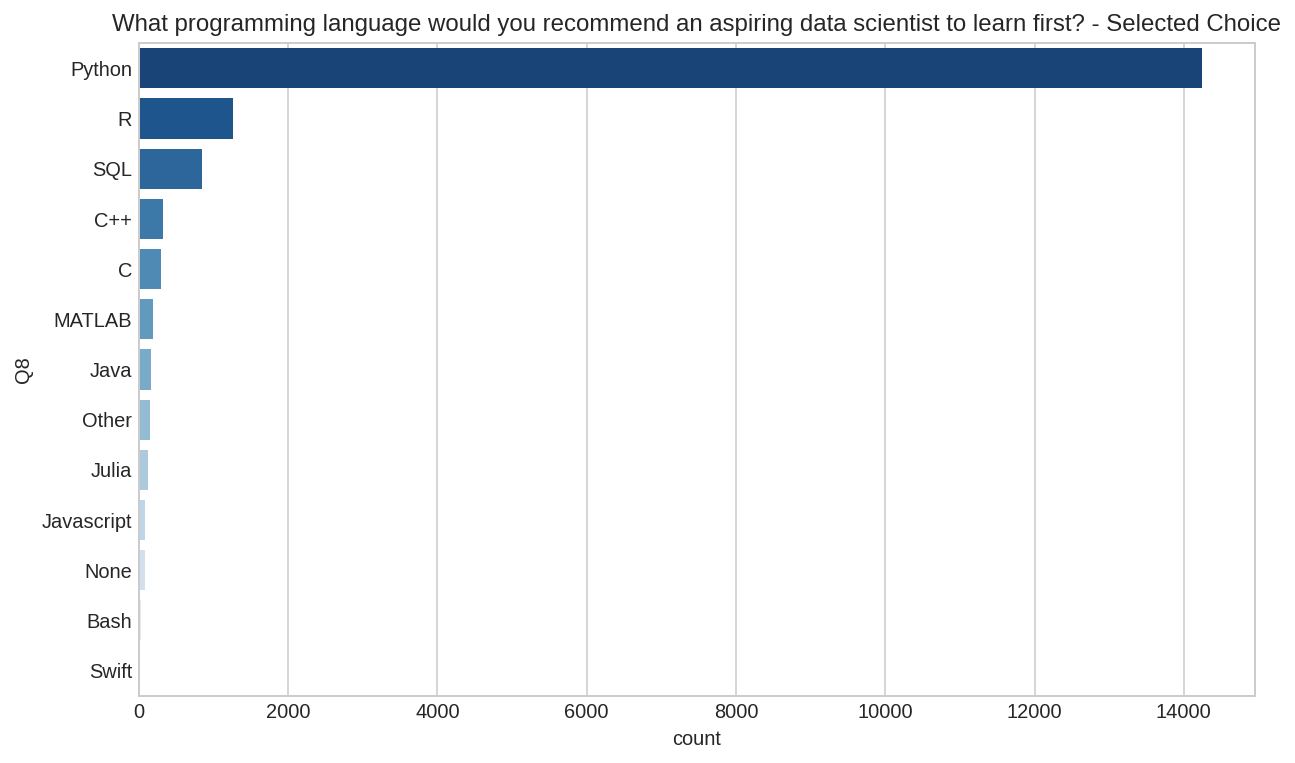

In [18]:
# 처음으로 배우는 프로그래밍 언어로 어떤 것을 추천하겠느냐?
show_plot_by_qno("Q8")

# Q9 Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply)

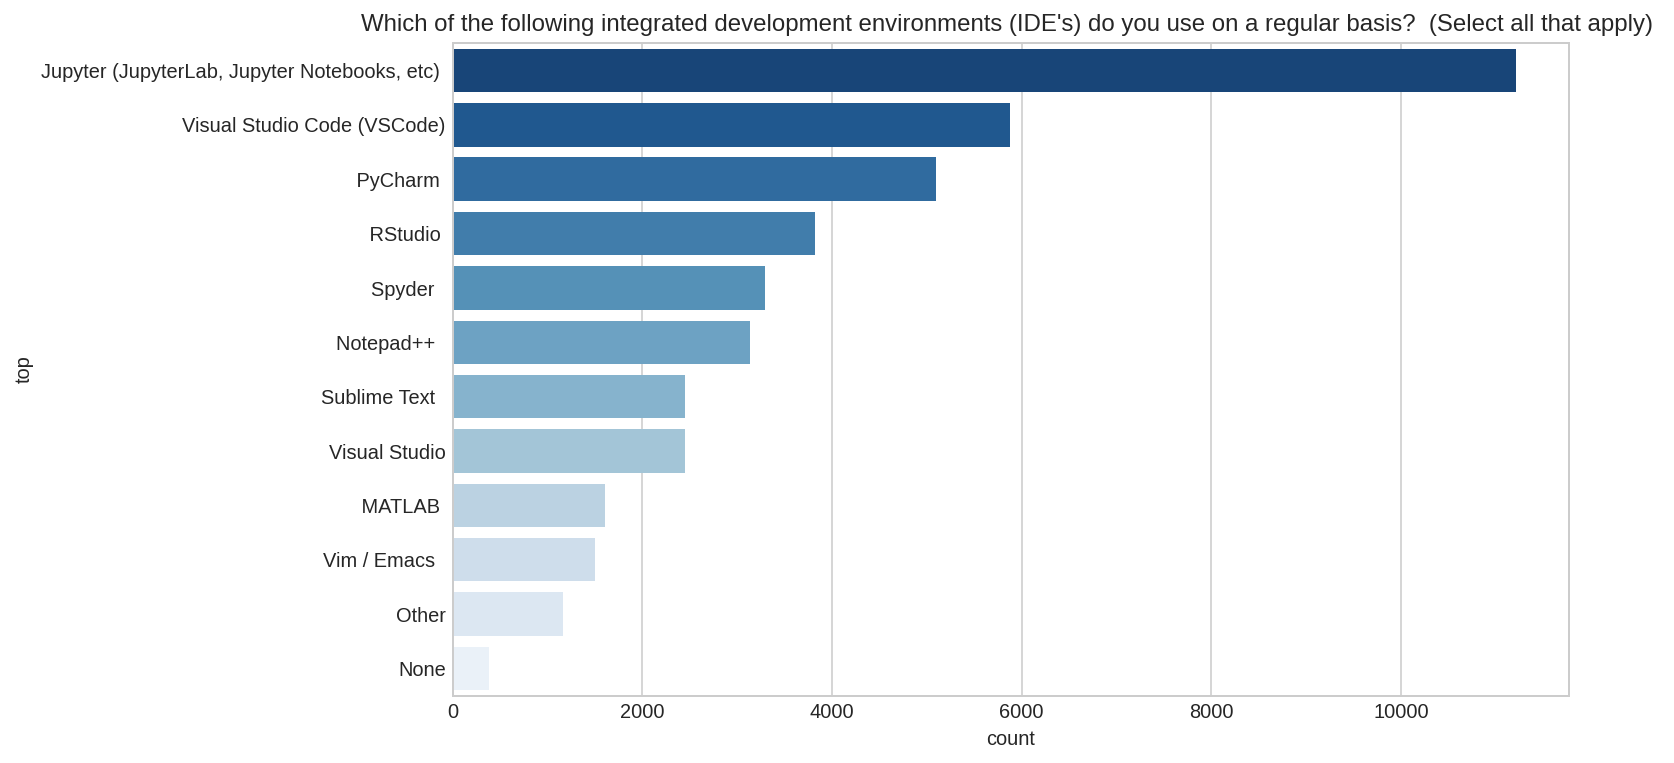

In [29]:
# 어떤 IDE 통합개발환경을 사용하느냐?
show_plot_by_qno("Q9")

# Q10 Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply)

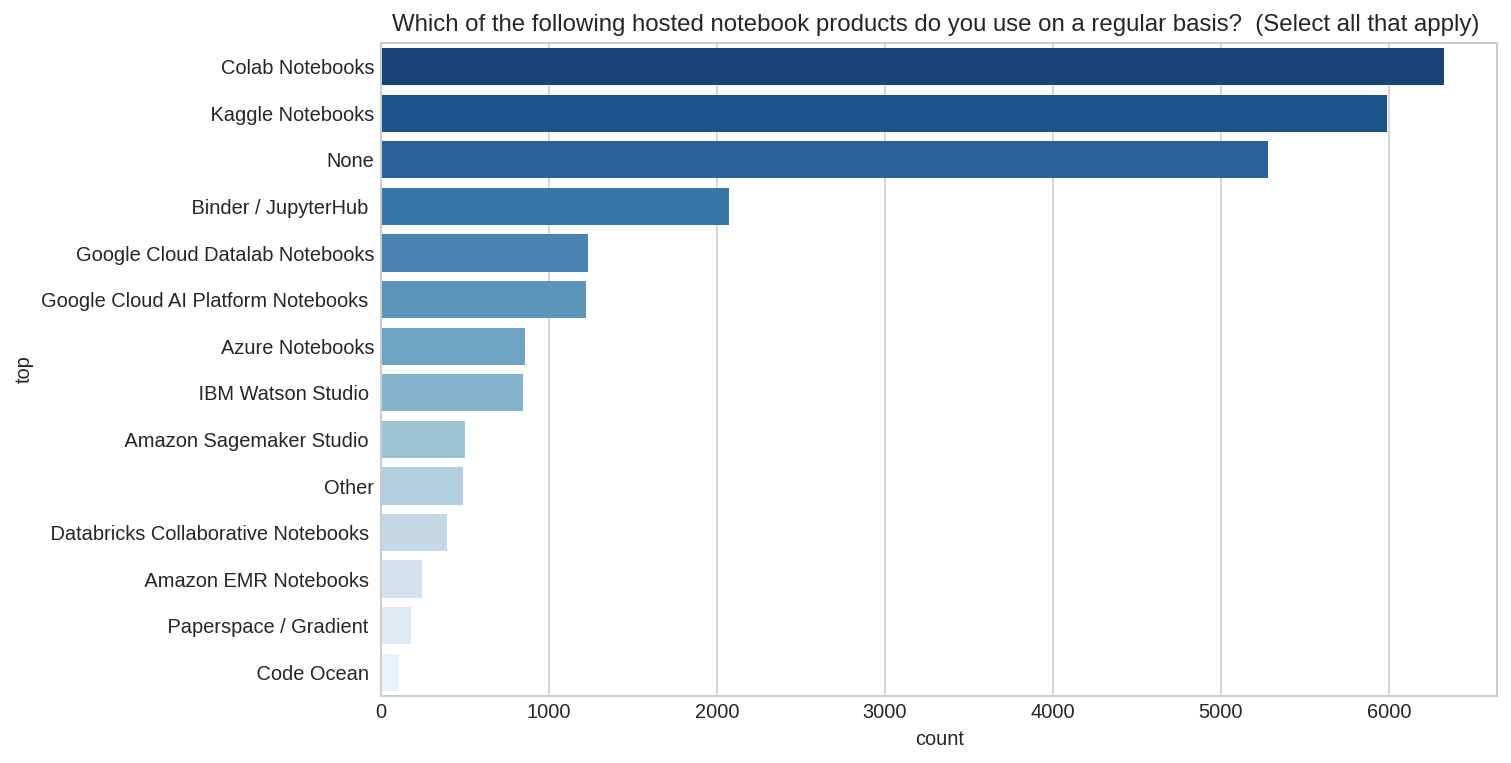

In [30]:
# 호스팅된 노트북 어떤 것을 사용하느냐?
show_plot_by_qno("Q10")

# Q11 What type of computing platform do you use most often for your data science projects?

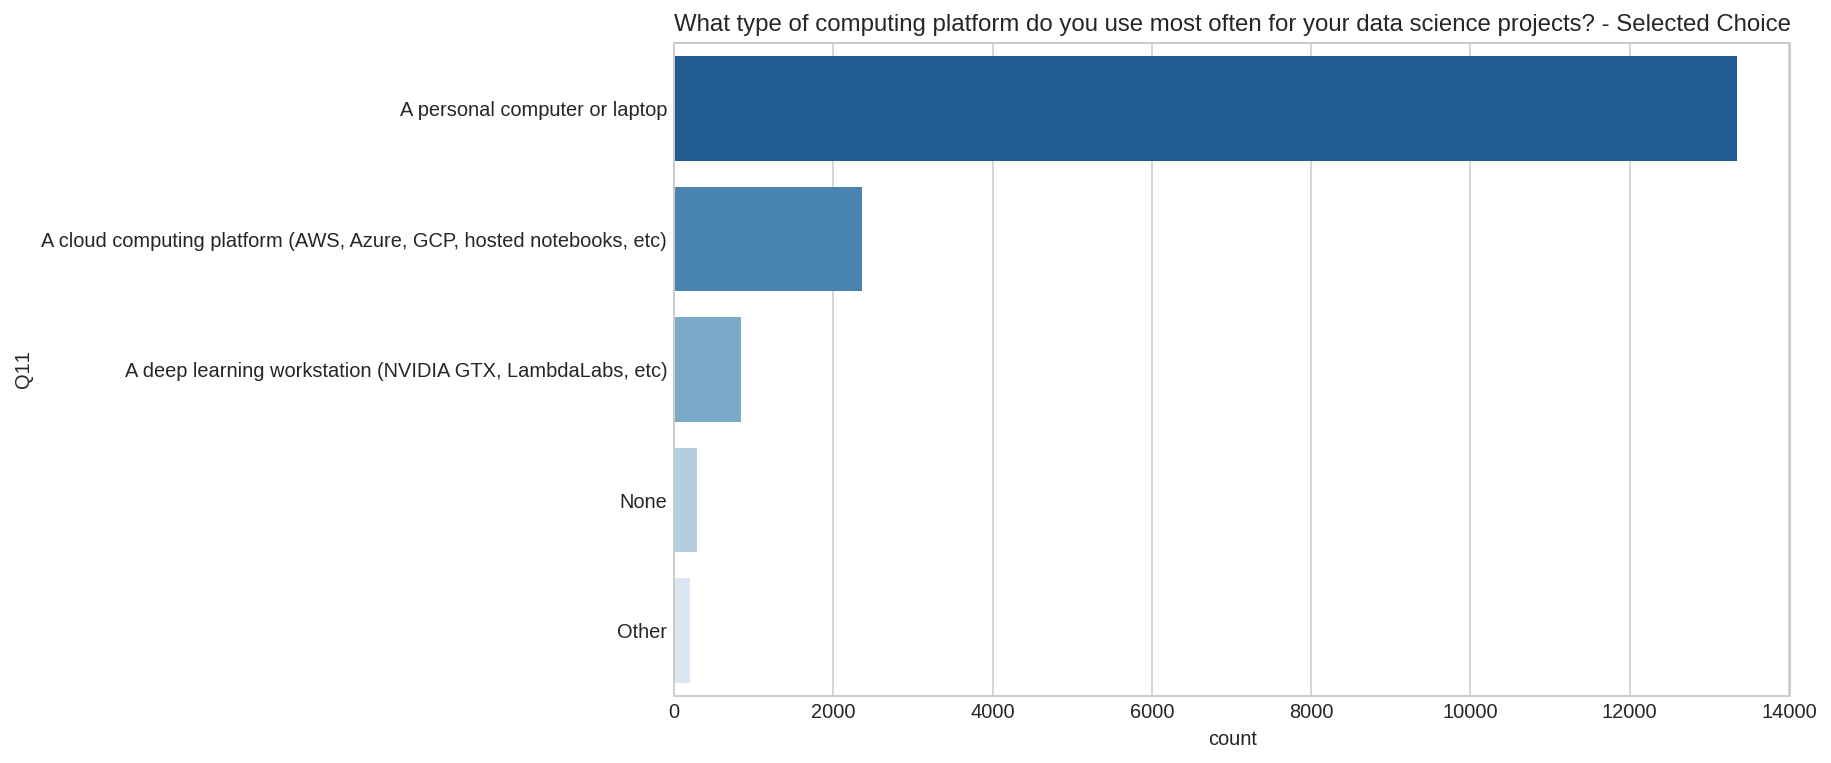

In [31]:
# 프로젝트에 주로 사용하는 플랫폼이 어떤 거냐?
show_plot_by_qno("Q11")

# Q12 Which types of specialized hardware do you use on a regular basis?  (Select all that apply)

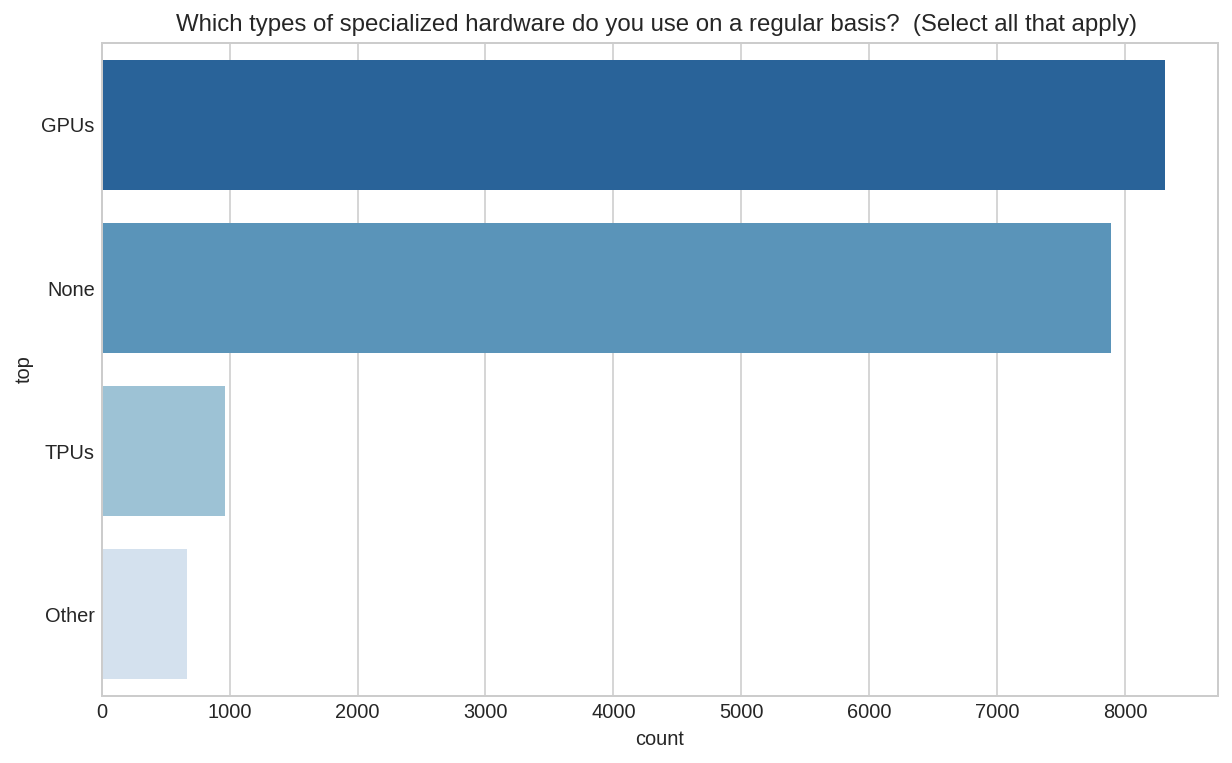

In [32]:
# 특별히 사용하는 하드웨어가 있냐?
show_plot_by_qno("Q12")

# Q13 Approximately how many times have you used a TPU (tensor processing unit)?

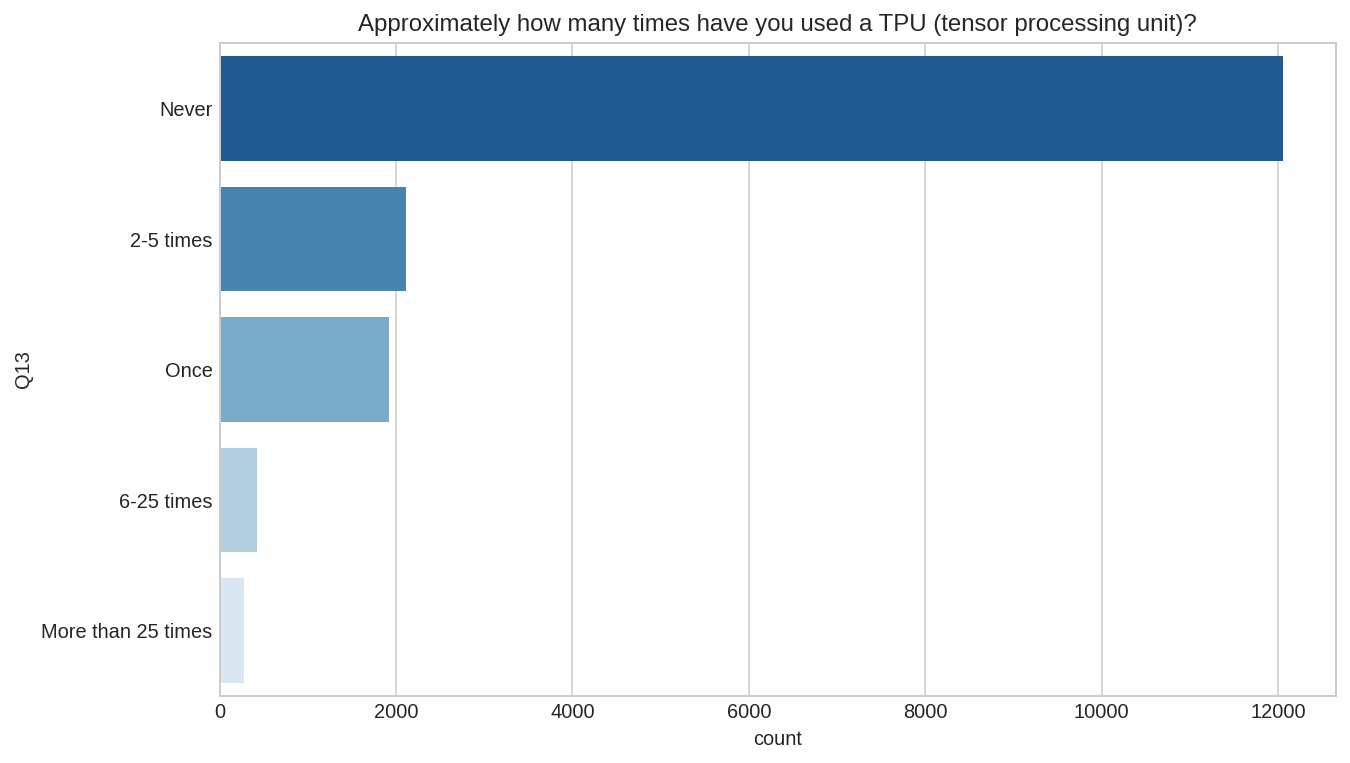

In [33]:
# TPU를 어느정도 사용하는지
show_plot_by_qno("Q13")

# Q14 What data visualization libraries or tools do you use on a regular basis?  (Select all that apply)

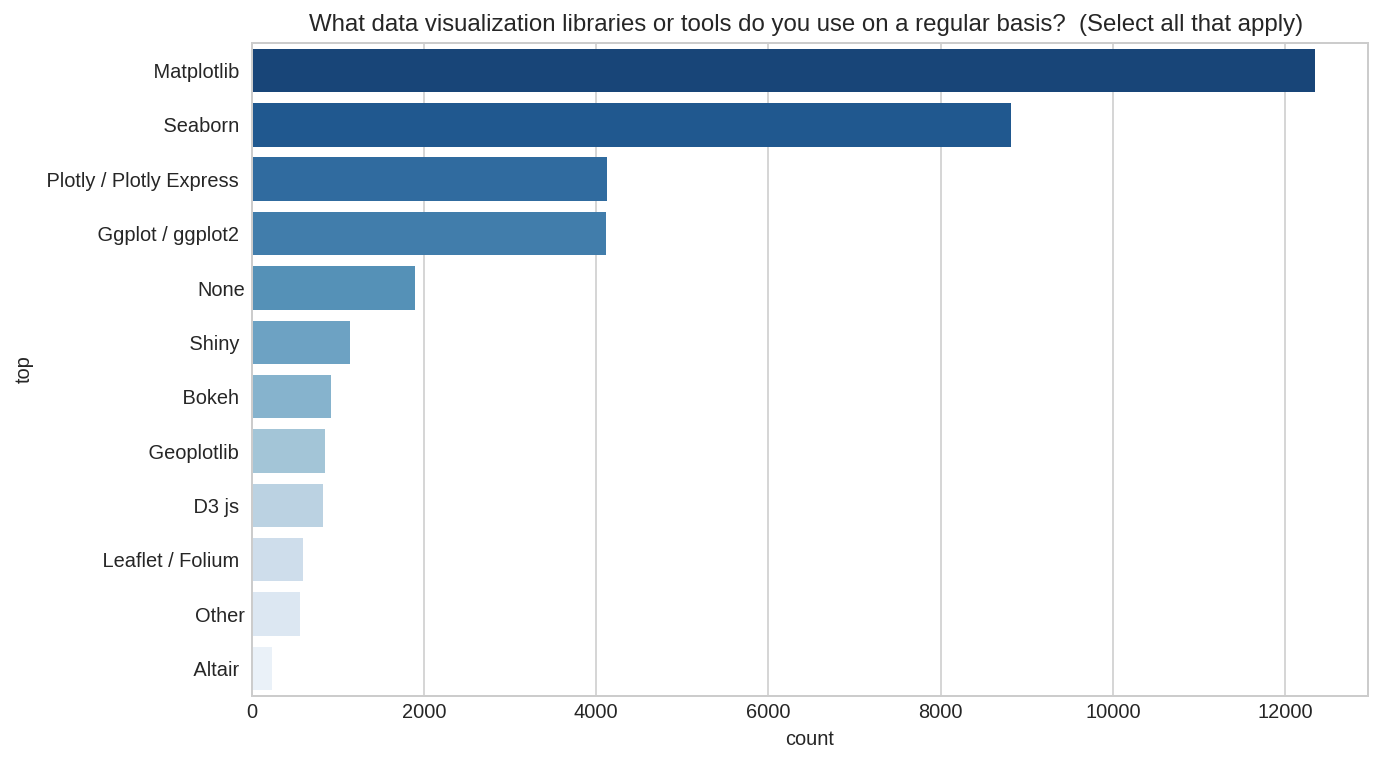

In [34]:
# 시각화도구 어떤 것을 사용하는지
show_plot_by_qno("Q14")

# Q15 For how many years have you used machine learning methods?

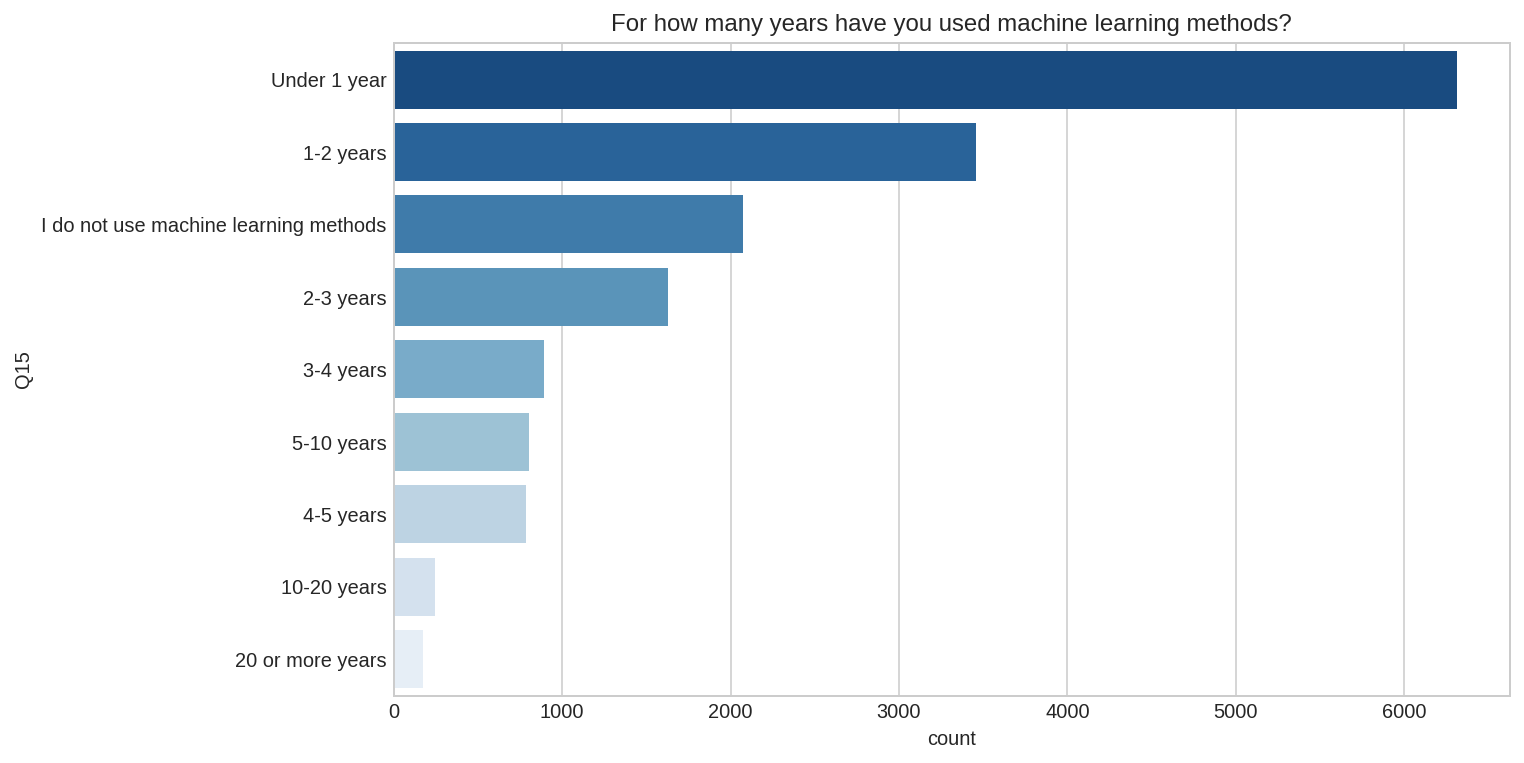

In [35]:
# 머신러닝 얼마나 사용했냐
show_plot_by_qno("Q15")

# Q16 Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)

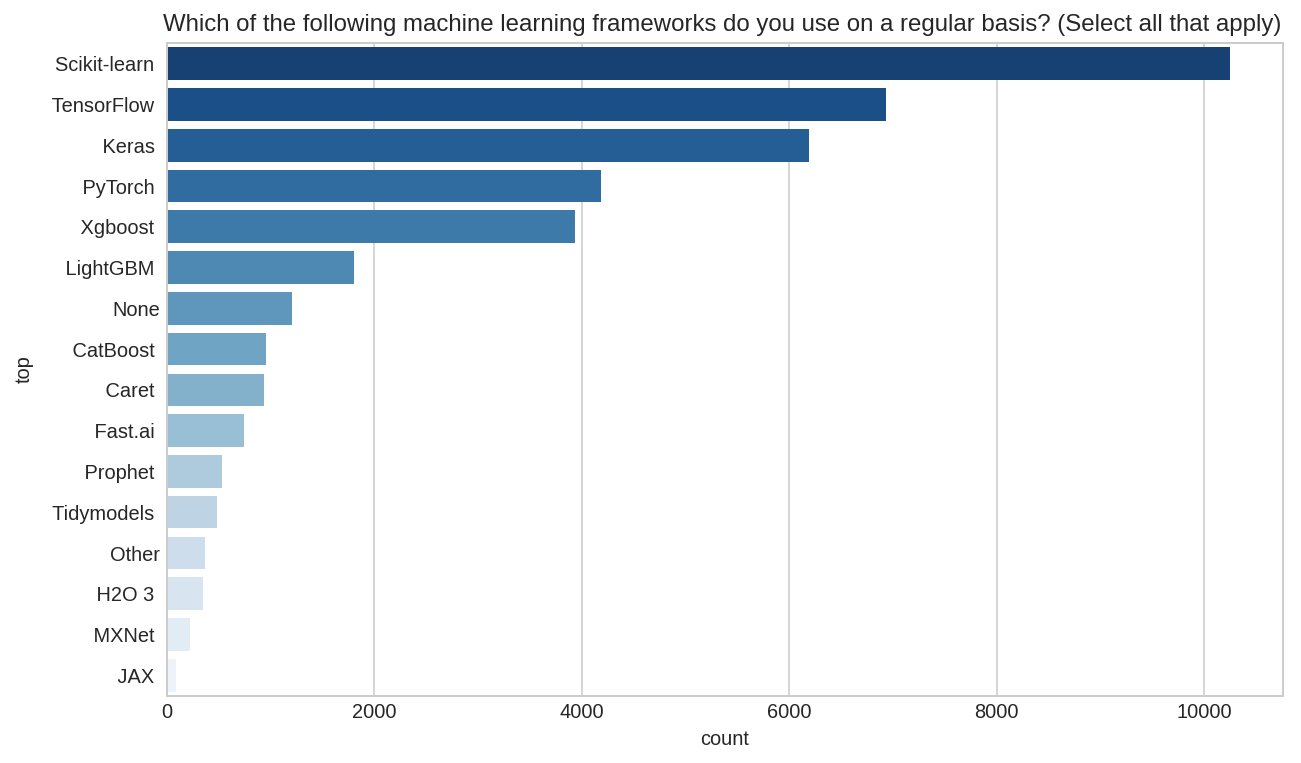

In [36]:
# 머신러닝 프레임워크로 보통 어느것을 사용하는지
show_plot_by_qno("Q16")

# Q17 Which of the following ML algorithms do you use on a regular basis? (Select all that apply)

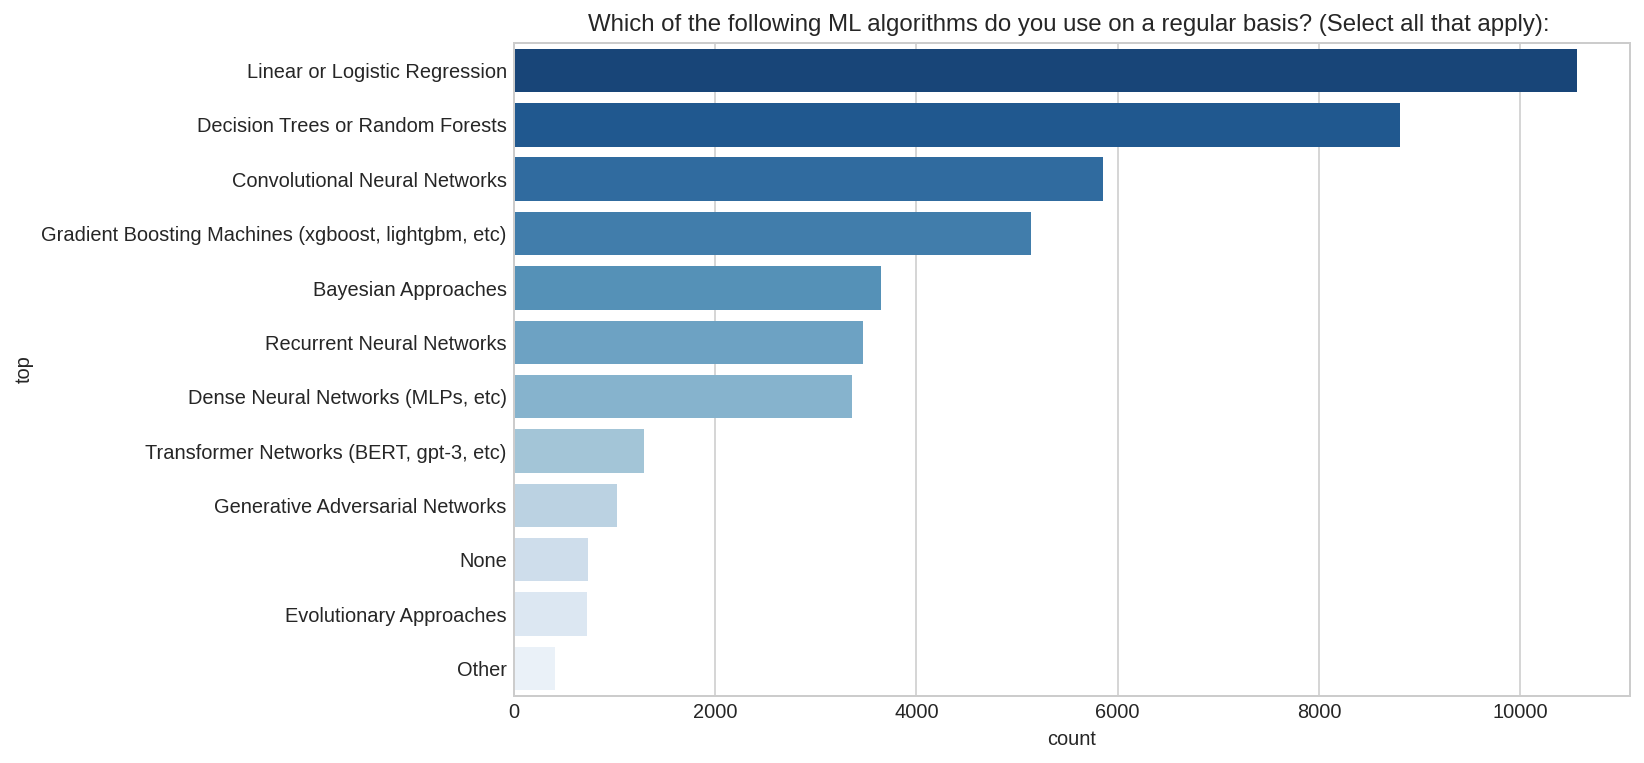

In [37]:
# 머신러닝 알고리즘으로 어떤 것을 사용하는지
show_plot_by_qno("Q17")

# Q18 Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) 

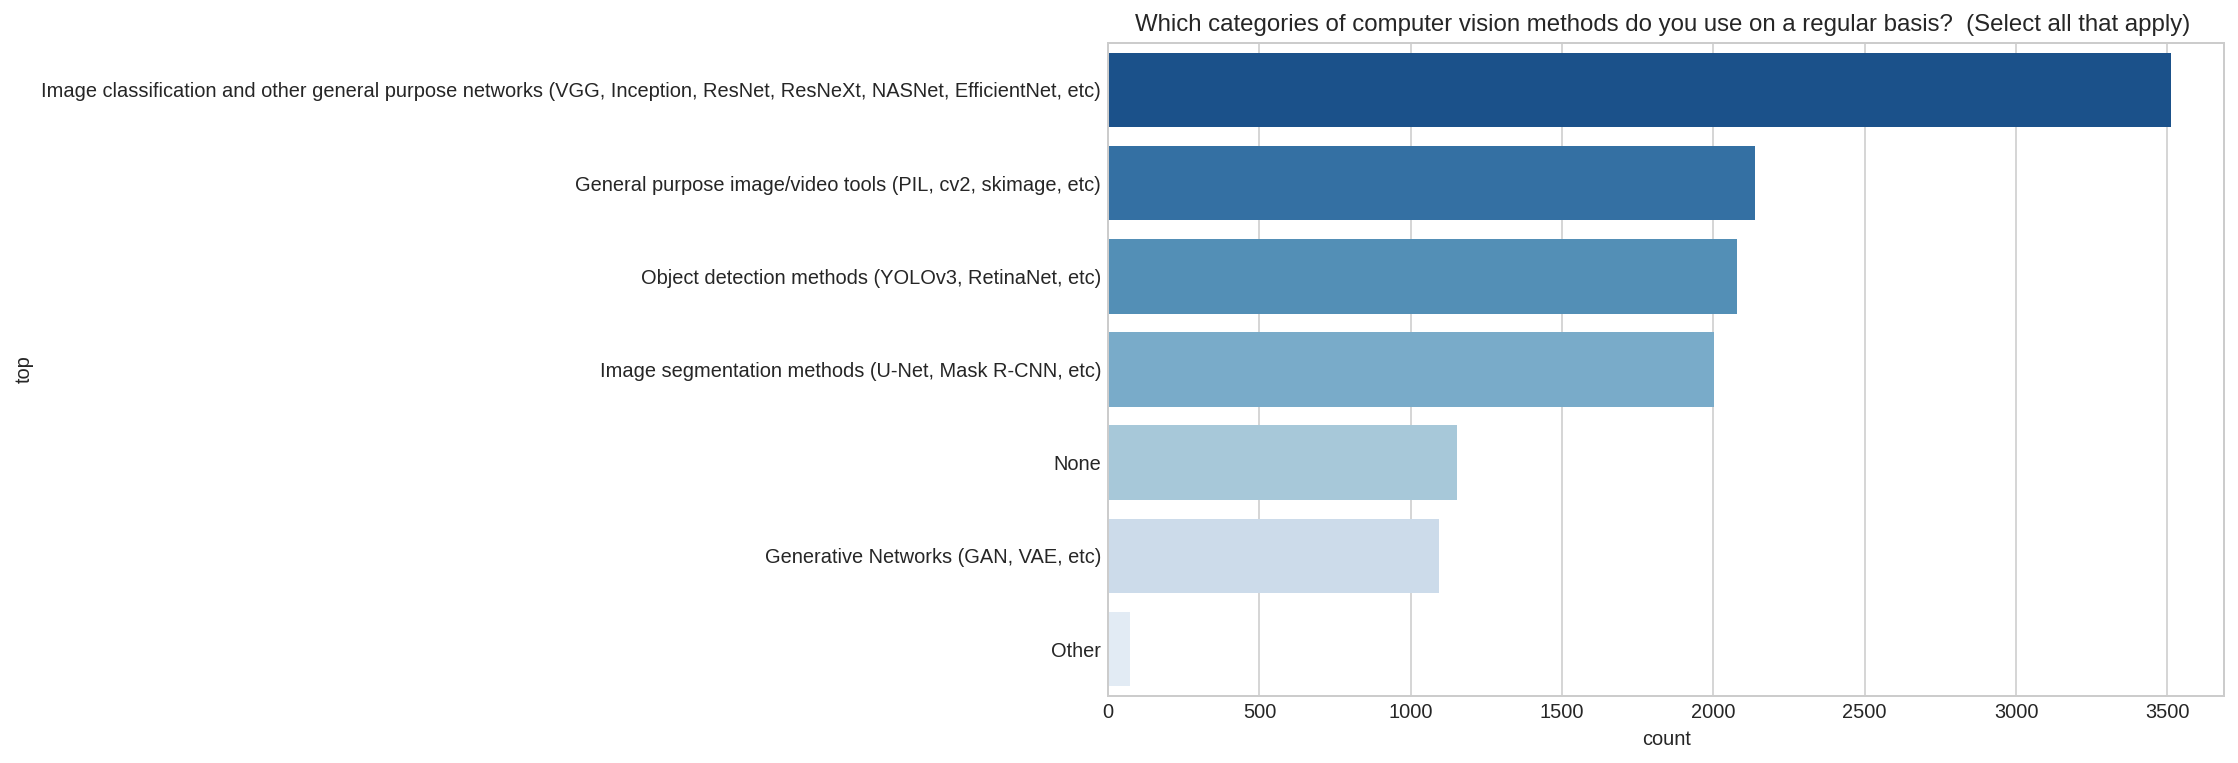

In [38]:
# 컴퓨터 비전 어떤 걸 가장 많이 사용하고 있는지
show_plot_by_qno("Q18")

# Q19 Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply)

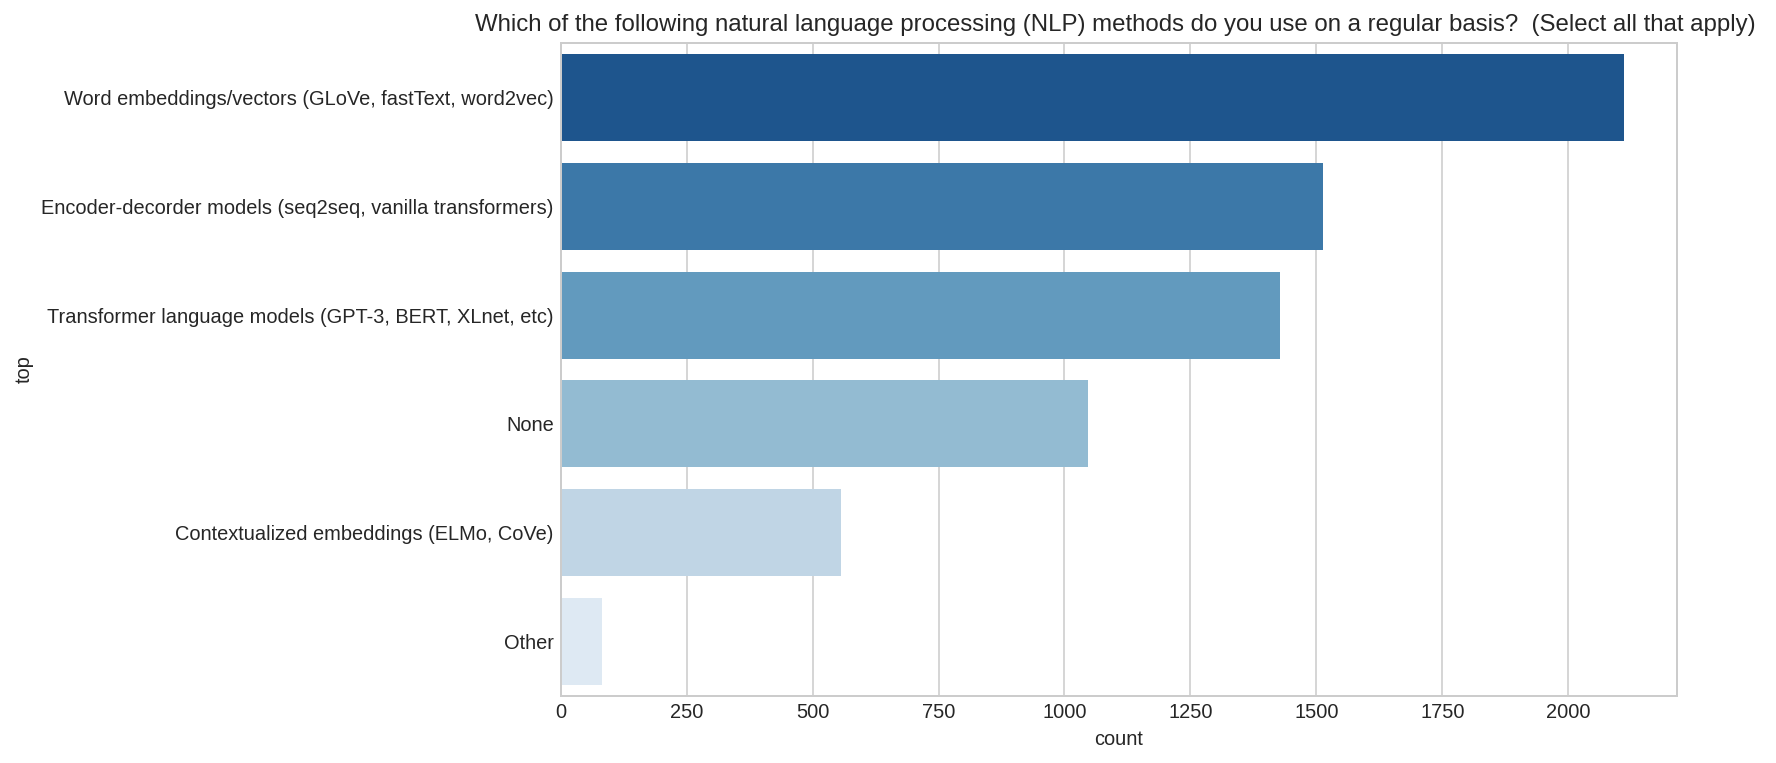

In [39]:
# 자연어처리 NLP 어떤걸 많이 사용하고 있는지
show_plot_by_qno("Q19")

# Q20 What is the size of the company where you are employed?

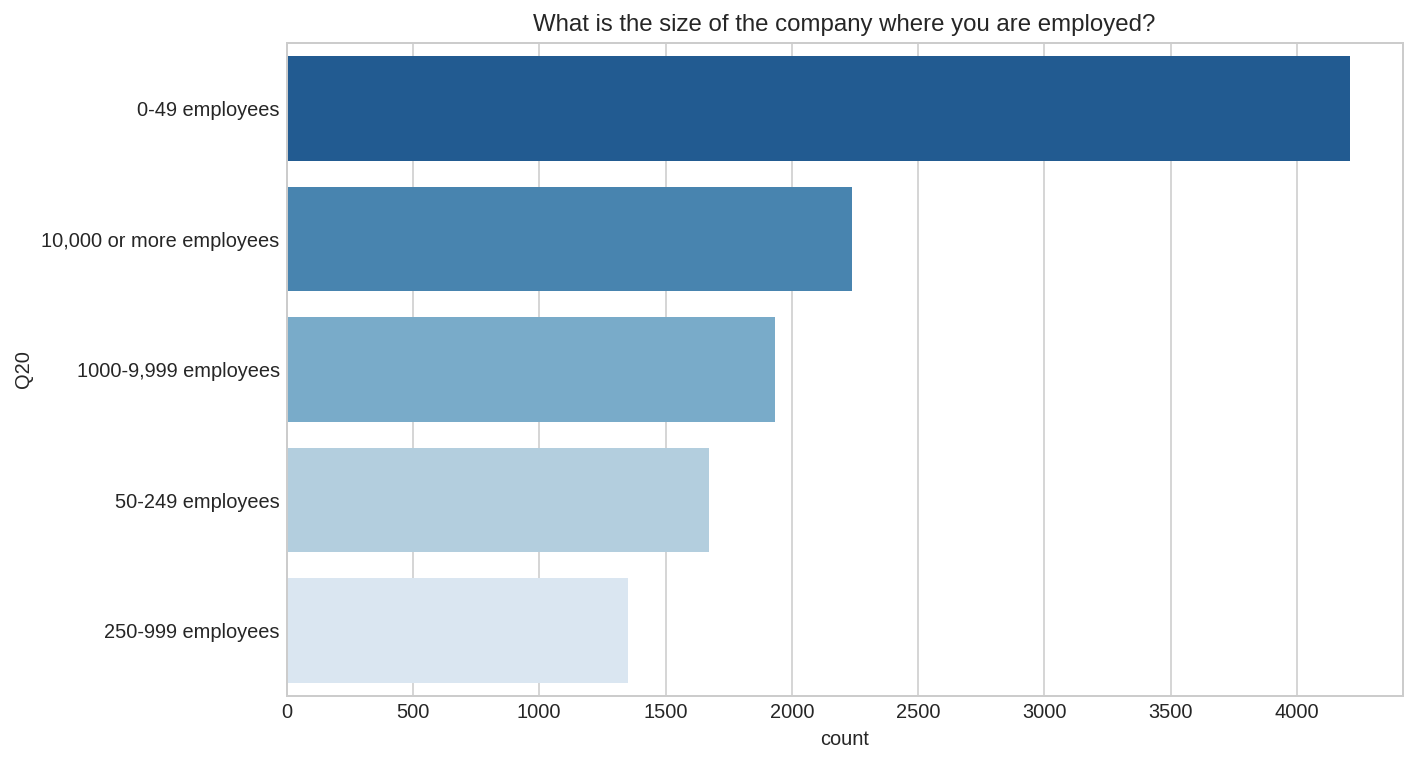

In [40]:
# 어느정도 규모의 회사에서 일을 하고 있는지
show_plot_by_qno("Q20")

# Q21 Approximately how many individuals are responsible for data science workloads at your place of business?

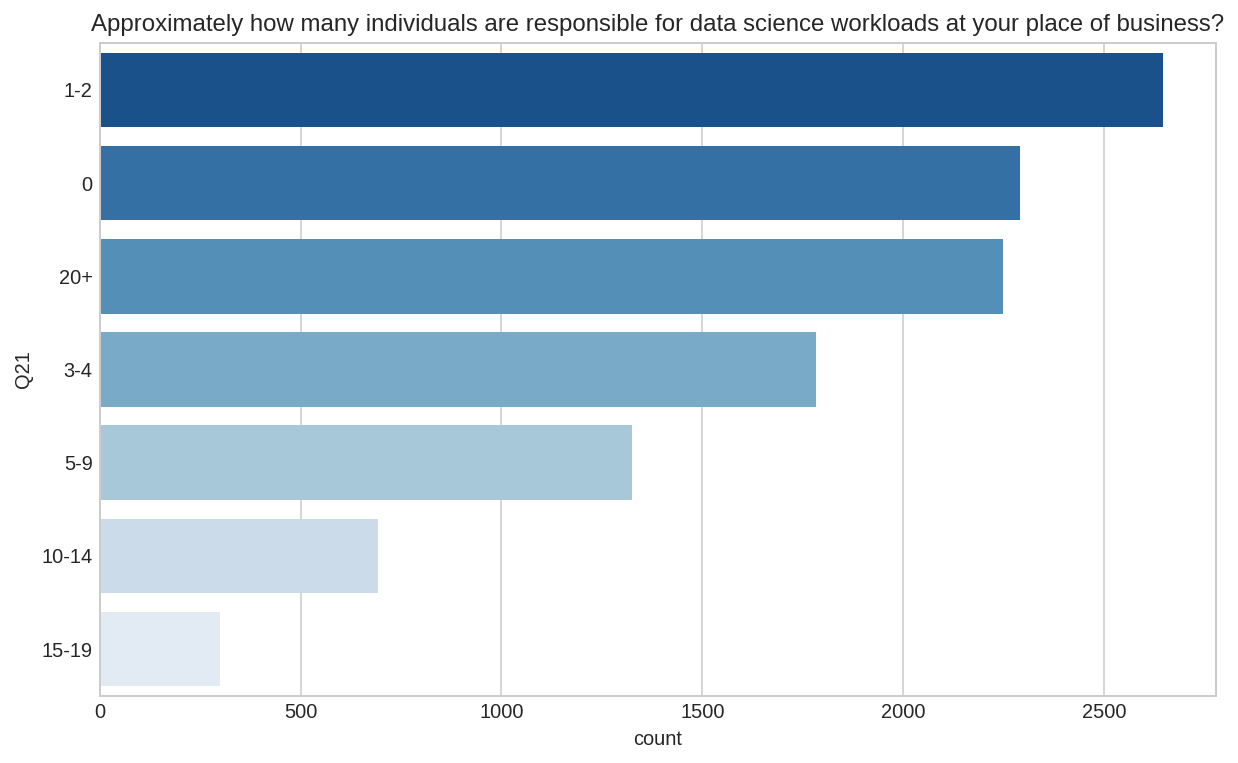

In [41]:
# 기업에서 몇명이 주로 데이터 사이언스 업무를 담당하고 있는지
show_plot_by_qno("Q21")

# Q22 Does your current employer incorporate machine learning methods into their business?

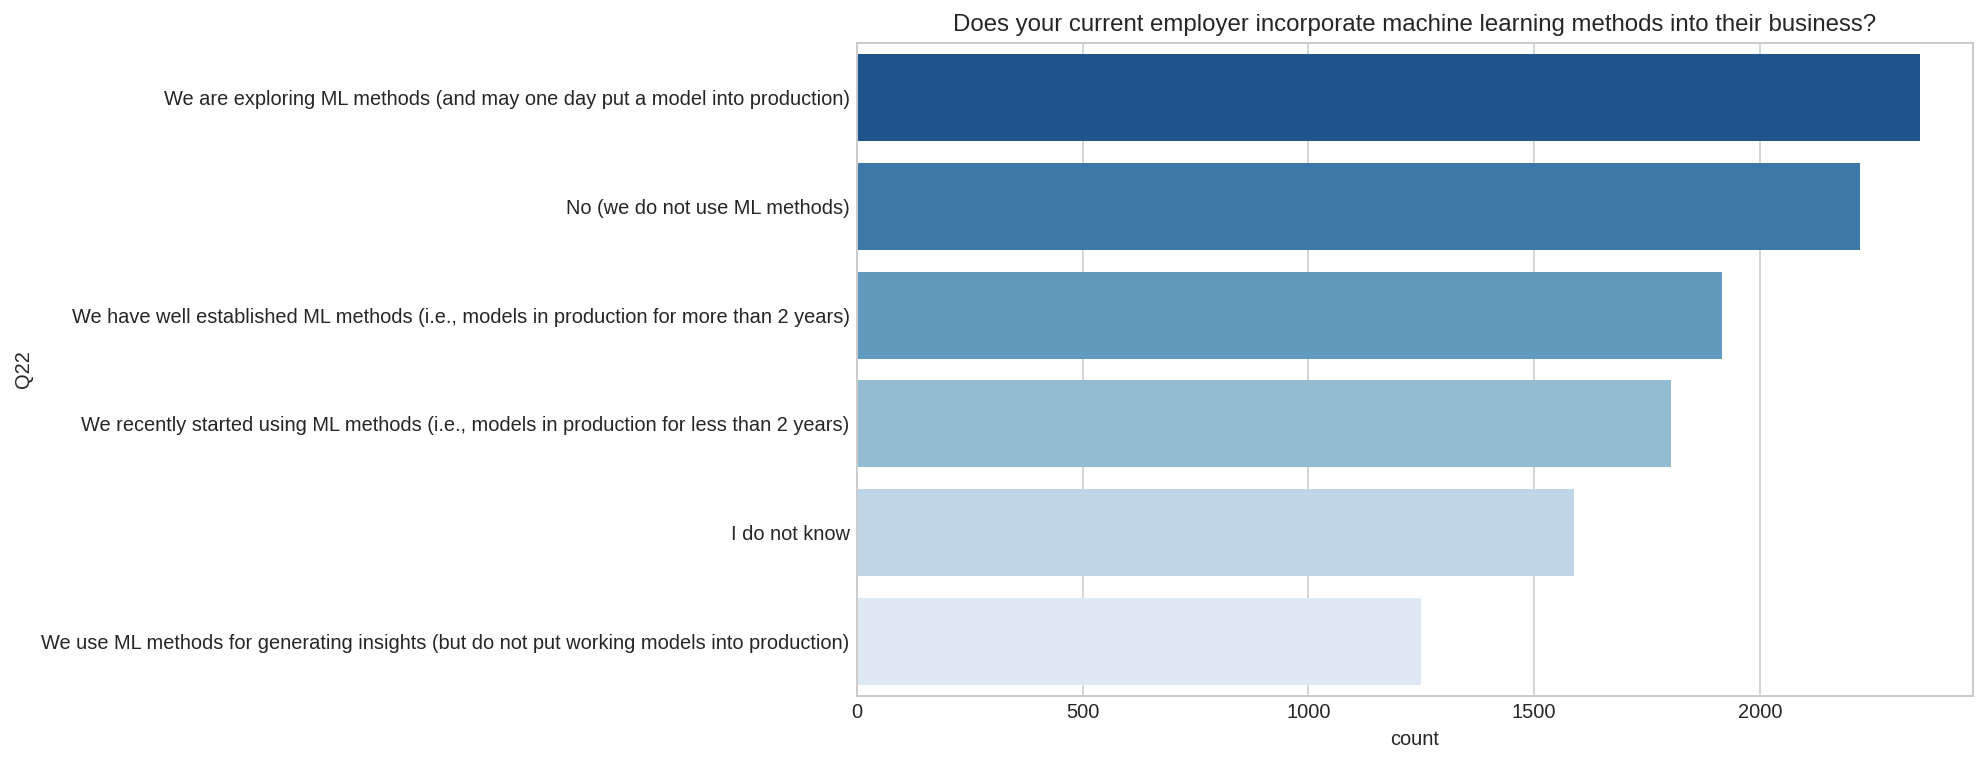

In [42]:
# 실제로 비지니스에서 머신러닝 메소드를 어느정도 사용하고 있는지
show_plot_by_qno("Q22")

#  Q23 Select any activities that make up an important part of your role at work: (Select all that apply)

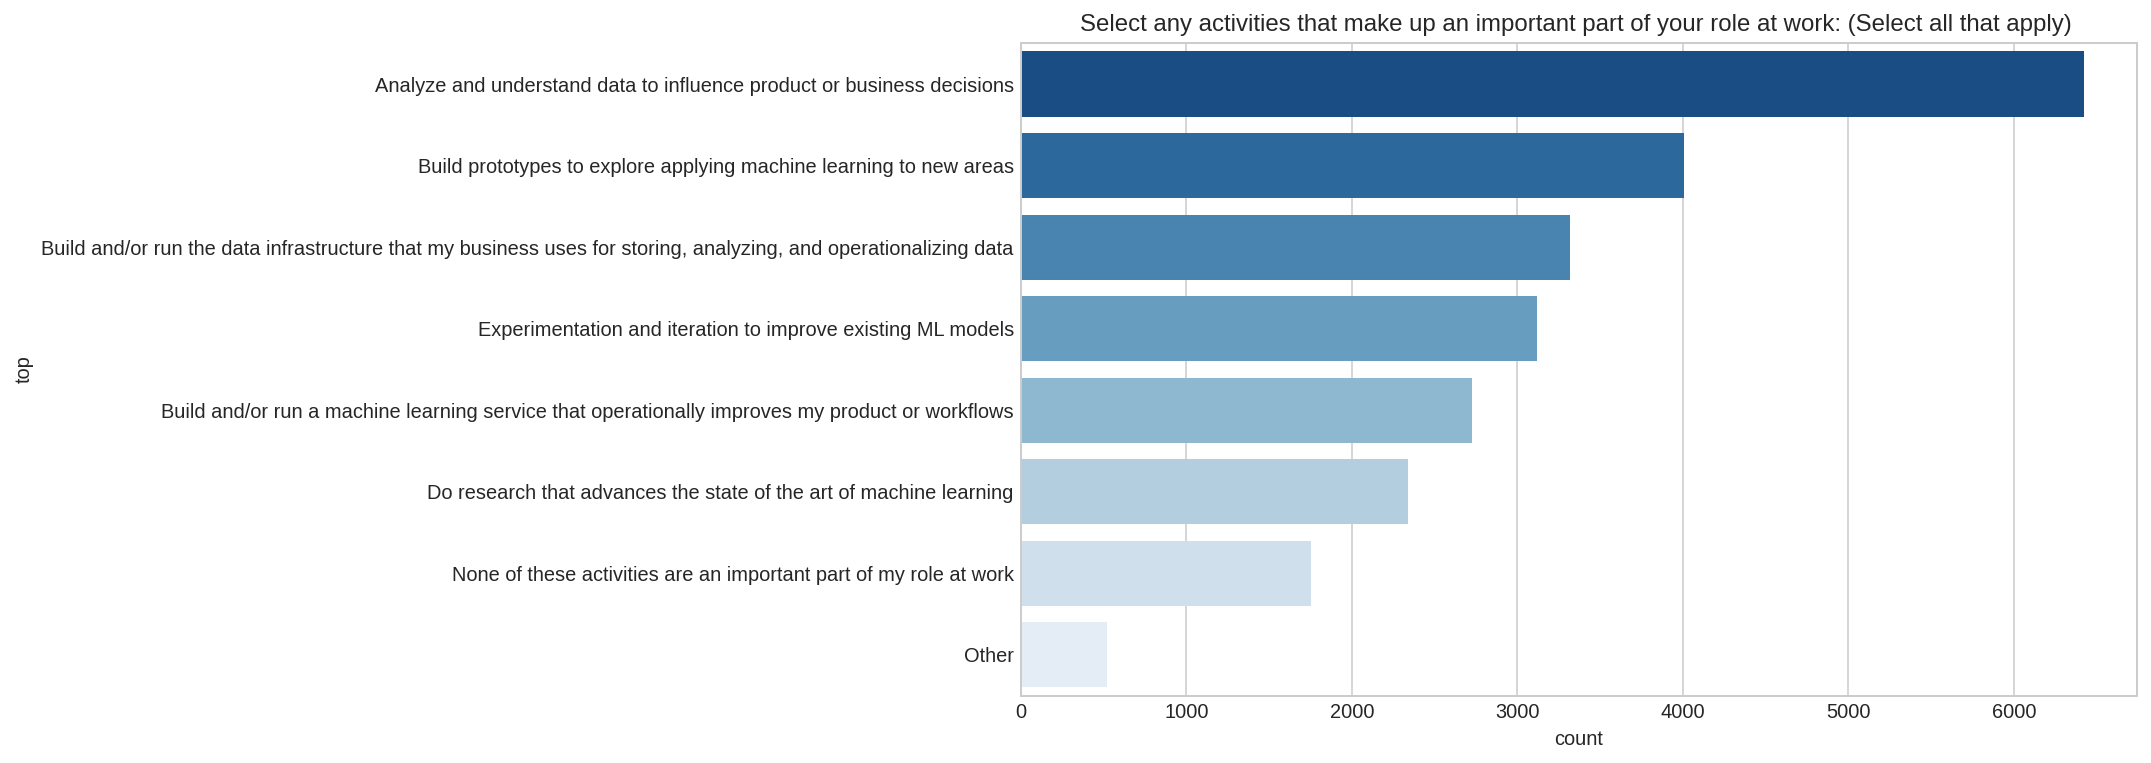

In [43]:
# 담당하고 있는 중요 업무가 뭐냐
show_plot_by_qno("Q23")

# Q24 What is your current yearly compensation (approximate $USD)?

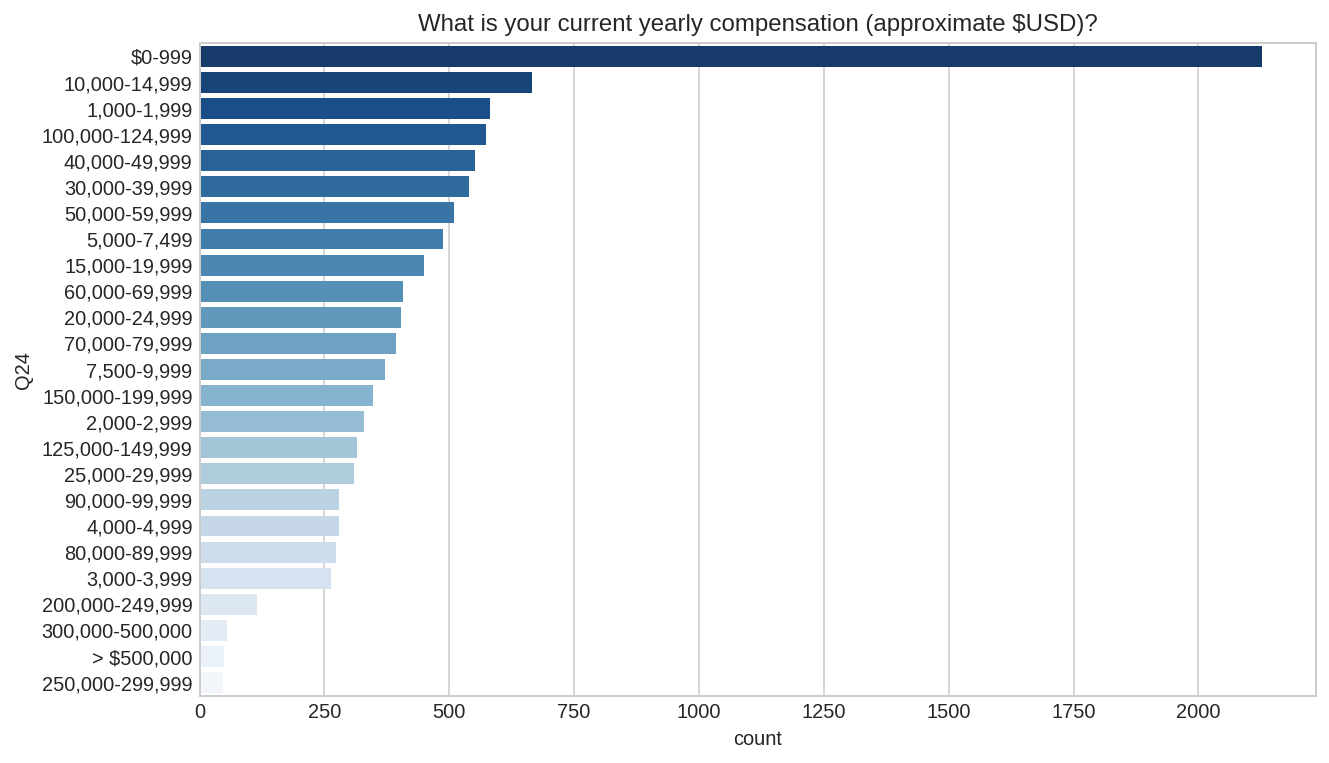

In [44]:
# 현재 받고 있는 임금이 어느정도 되는지
show_plot_by_qno("Q24")

In [45]:
# 임금순으로 정렬
q24_count = answer["Q24"].value_counts().reset_index()
q24_count.columns = ["range", "count"]
q24_count.sort_values("range") # 앞에 0이냐 1이냐 2냐 이런 식으로 정렬이 됨.

,range,count
0,$0-999,2128
2,"1,000-1,999",581
1,"10,000-14,999",665
3,"100,000-124,999",573
15,"125,000-149,999",315
8,"15,000-19,999",449
13,"150,000-199,999",347
14,"2,000-2,999",330
10,"20,000-24,999",404
21,"200,000-249,999",115


In [46]:
# 숫자 순으로 정렬되도록
q24_count["range"].str.split("-")
q24_count["range"].str.split("-", expand=True) # 데이터프레임 형태
q24_count["min"] = q24_count["range"].str.split("-", expand=True)[0]
q24_count["max"] = q24_count["range"].str.split("-", expand=True)[1]

# 숫자로 바꿔주기 위해서 특수문자 다 제거
# q24_count["min"].str.replace(",|\$|>","") # $: 정규표현식이라서 $그대로 쓰려면 \$로
q24_count["min"] = q24_count["min"].str.replace(",|\$|>","").astype(int)
q24_count = q24_count.sort_values("min")
q24_count

,range,count,min,max
0,$0-999,2128,0,999
2,"1,000-1,999",581,1000,"1,999"
14,"2,000-2,999",330,2000,"2,999"
20,"3,000-3,999",264,3000,"3,999"
18,"4,000-4,999",279,4000,"4,999"
7,"5,000-7,499",488,5000,"7,499"
12,"7,500-9,999",371,7500,"9,999"
1,"10,000-14,999",665,10000,"14,999"
8,"15,000-19,999",449,15000,"19,999"
10,"20,000-24,999",404,20000,"24,999"


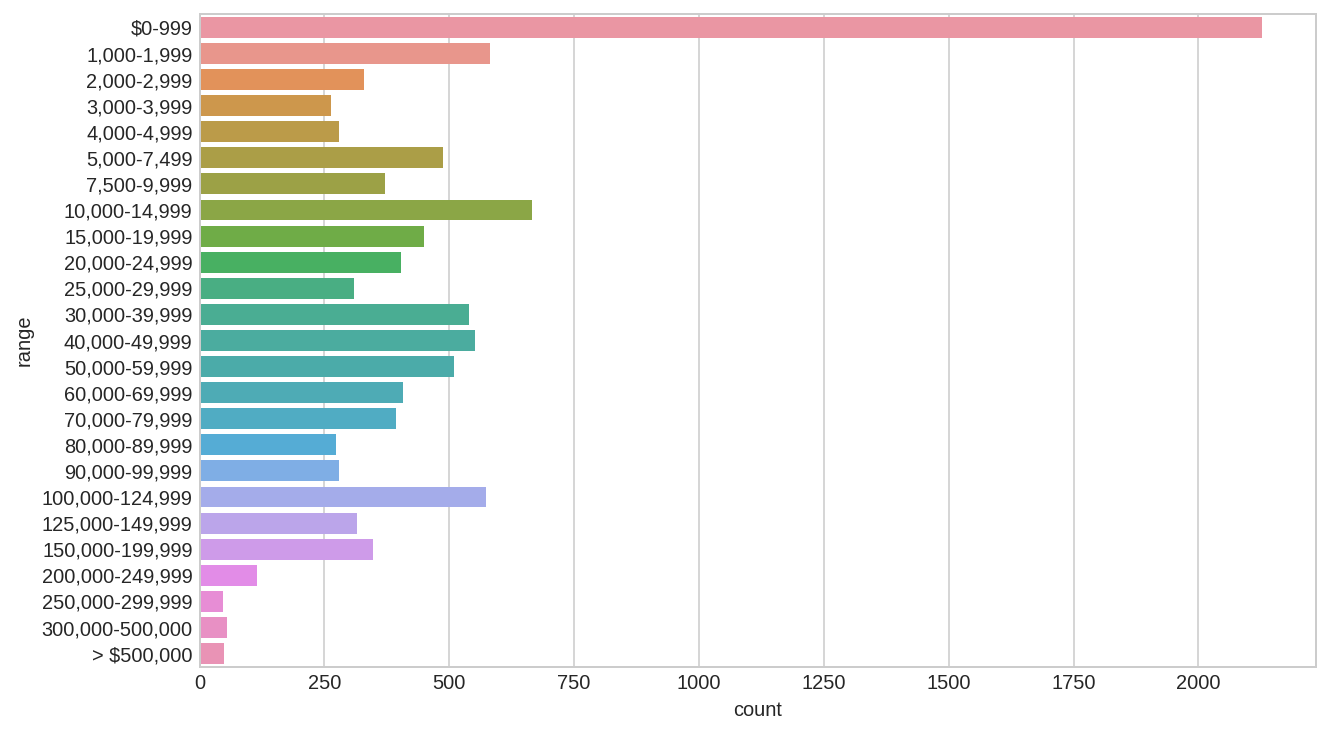

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(data=q24_count, y="range", x="count")

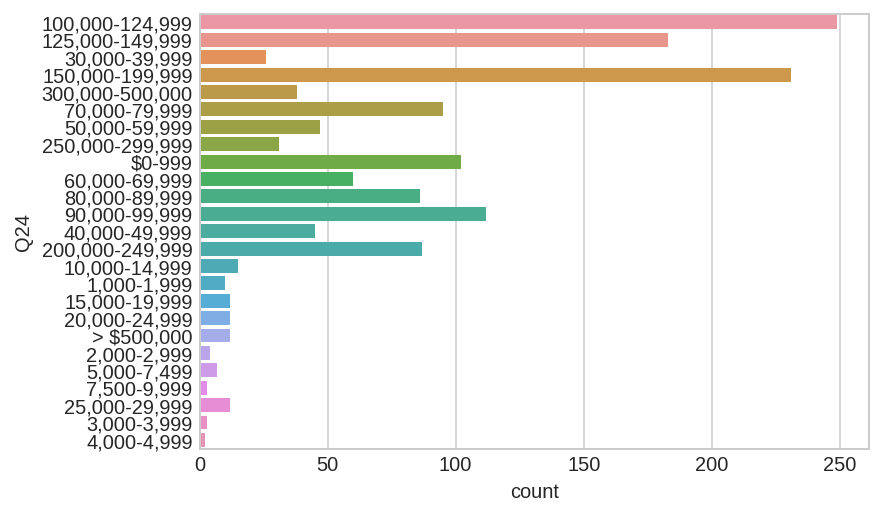

In [48]:
# 미국 응답자만 보고싶다!
question # Q3가 국가에 대한 내용
answer['Q3'].value_counts()
q3_usa = answer[answer['Q3'].isin(["United States of America"])]

sns.countplot(data=q3_usa, y="Q24")

In [49]:
q24_cols = q24_count.range.tolist()

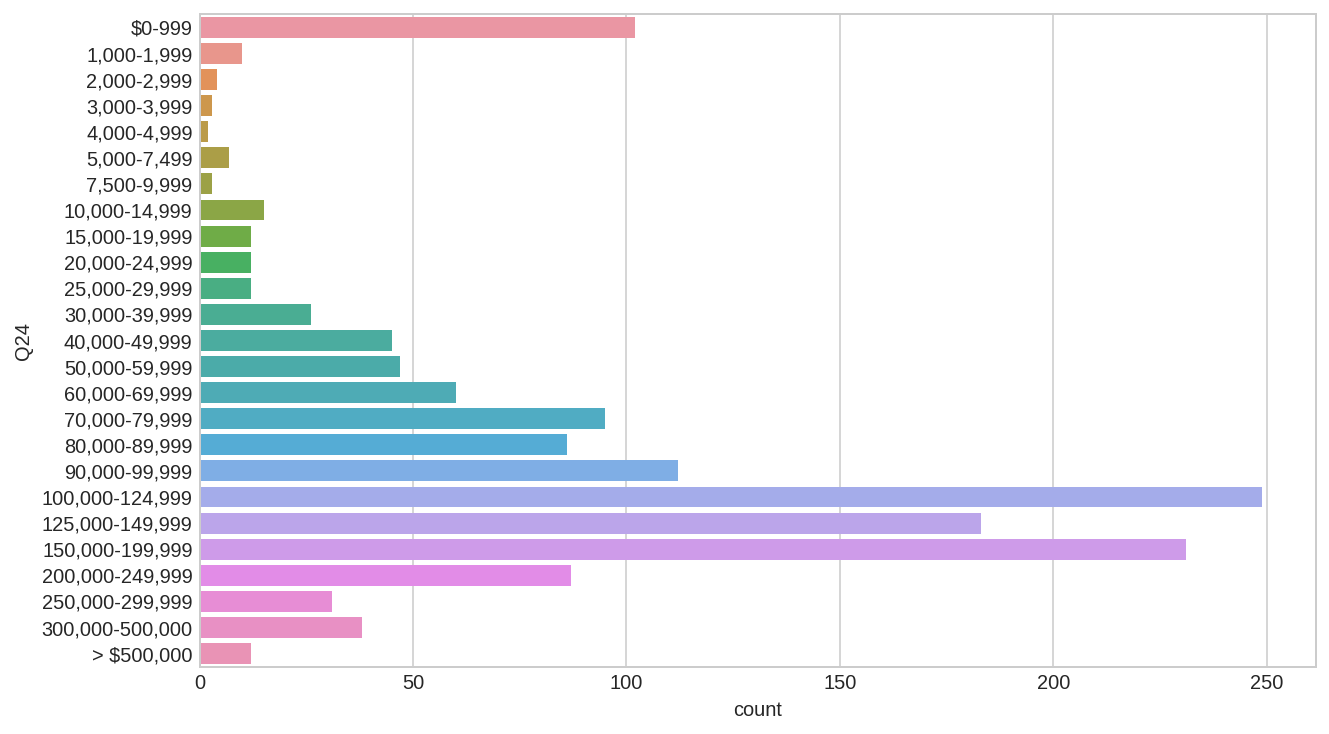

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(data=q3_usa, y="Q24", order=q24_cols)

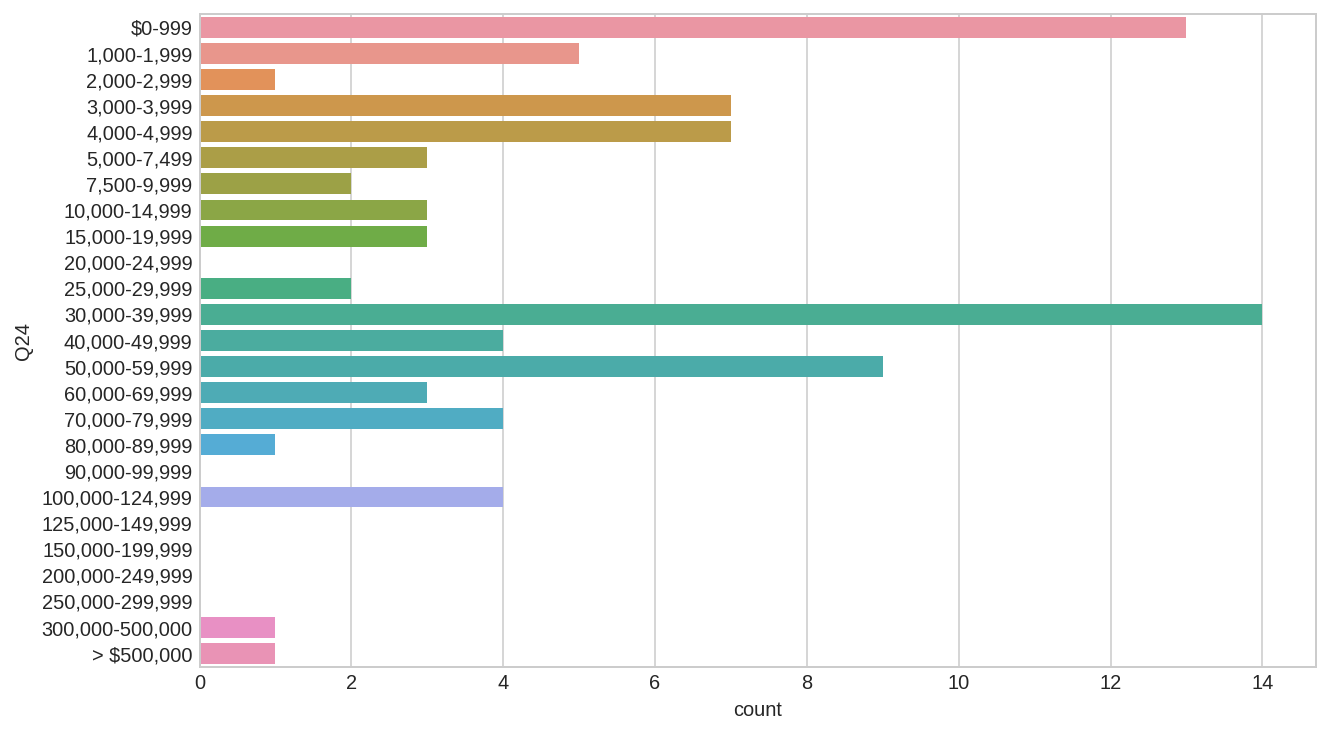

In [51]:
# 한국꺼 알아보자
answer['Q3'].value_counts()
q3_korea = answer[answer['Q3'].isin(["South Korea"])]
plt.figure(figsize=(10,6))
sns.countplot(data=q3_korea, y="Q24", order=q24_cols)